In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix

In [4]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)
jnj = web.DataReader('JNJ','yahoo', start, end)
coke = web.DataReader('COKE','yahoo', start, end)
pepsi = web.DataReader('PEP','yahoo', start, end)

In [5]:
jnj.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,66.000000,65.250000,65.589996,65.879997,16116200.0,53.417271
2012-01-04,65.879997,65.110001,65.750000,65.480003,9243100.0,53.092957
2012-01-05,65.599998,64.830002,65.320000,65.400002,11886900.0,53.028076
2012-01-06,65.459999,64.610001,65.440002,64.830002,15359900.0,52.565910
2012-01-09,65.089996,64.410004,64.959999,64.930000,7934600.0,52.646999


In [6]:
coke.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.189999,58.099998,59.189999,58.599998,37200.0,54.632023
2012-01-04,58.720001,57.639999,58.400002,57.669998,18500.0,53.764980
2012-01-05,58.369999,57.419998,57.740002,57.779999,8500.0,53.867542
2012-01-06,58.189999,56.730000,57.759998,56.730000,17400.0,52.888634
2012-01-09,57.520000,56.799999,57.520000,57.139999,12200.0,53.270874


In [7]:
pepsi.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,67.190002,66.360001,66.860001,66.400002,5348800.0,53.645847
2012-01-04,66.839996,66.120003,66.410004,66.739998,6042400.0,53.920540
2012-01-05,66.669998,66.120003,66.580002,66.220001,4909100.0,53.500423
2012-01-06,66.269997,65.290001,66.269997,65.389999,6533000.0,52.829842
2012-01-09,65.830002,65.010002,65.260002,65.730003,5859600.0,53.104542


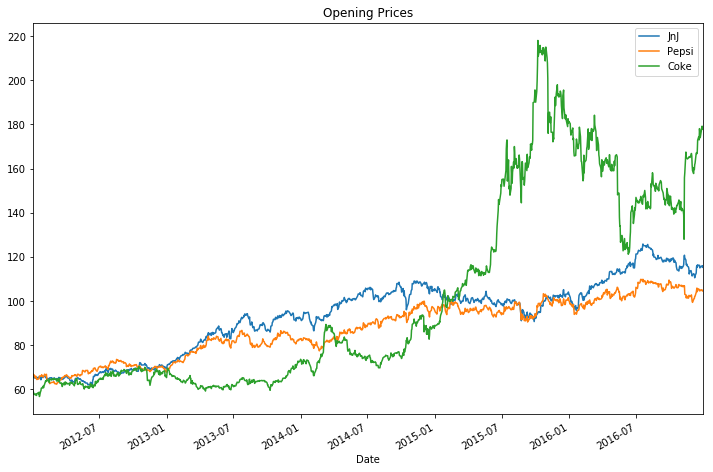

In [34]:
jnj['Open'].plot(label ='JnJ', figsize=(12,8), title='Opening Prices')
pepsi['Open'].plot(label='Pepsi')
coke['Open'].plot(label='Coke')
plt.legend();

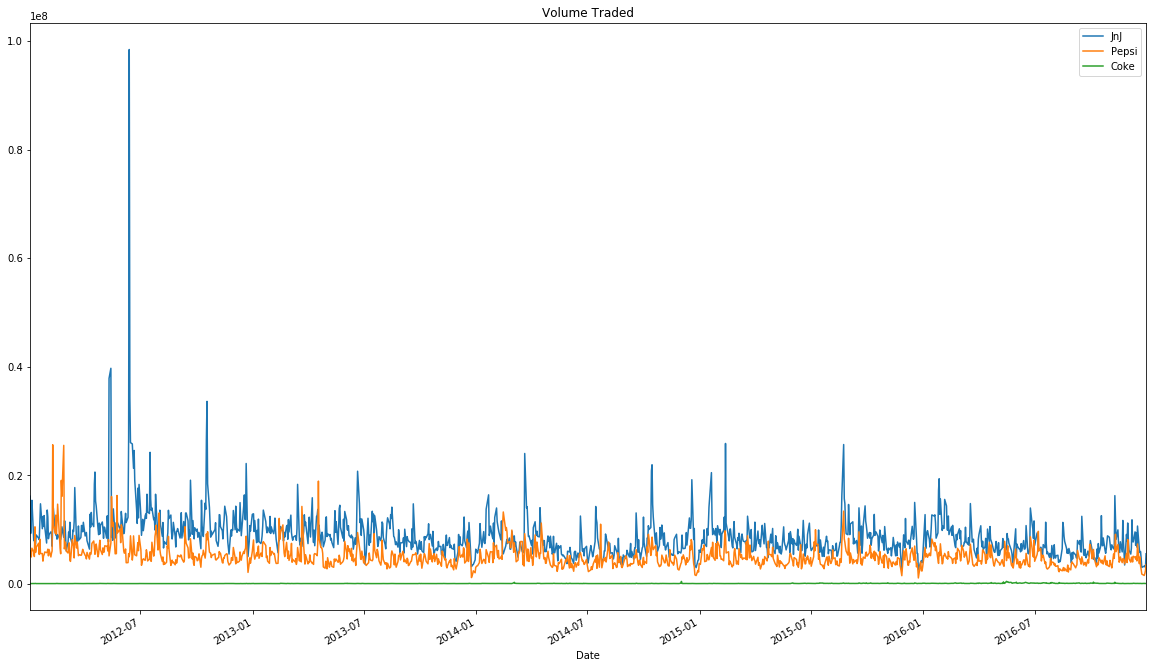

In [35]:
#Volume of stock each day
jnj['Volume'].plot(label='JnJ', figsize=(20,12), title='Volume Traded')
pepsi['Volume'].plot(label='Pepsi')
coke['Volume'].plot(label='Coke')
plt.legend();

In [10]:
jnj['Volume'].idxmax()

Timestamp('2012-06-13 00:00:00')

In [11]:
coke['Open'].idxmax()

Timestamp('2015-10-08 00:00:00')

MAX TOTAL TRADED FOR JNJ, PEPSI AND COKE:
6323798237.709045
1659968481.6207886
61970418.254089355


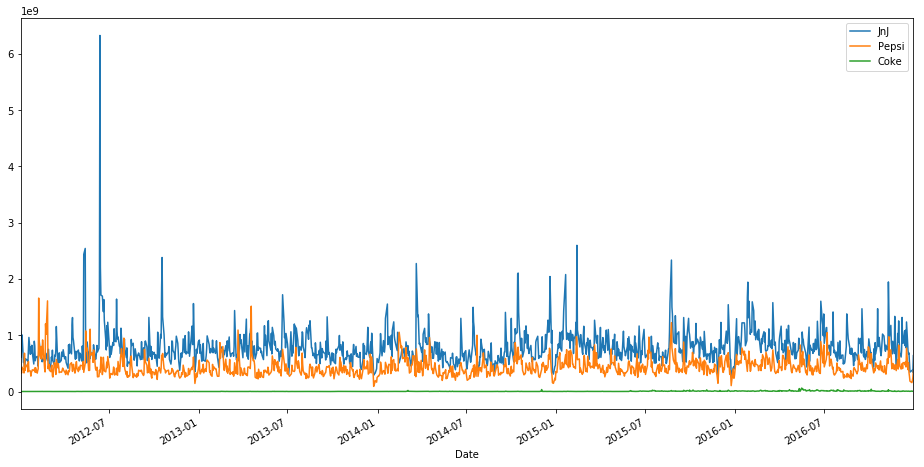

In [37]:
#Total Amount of Money traded = Opening price * Volume Traded
jnj['Total Traded'] = jnj['Open'] * jnj['Volume']
pepsi['Total Traded'] = pepsi['Open'] * pepsi['Volume']
coke['Total Traded'] = coke['Open'] * coke['Volume']
jnj['Total Traded'].plot(label = 'JnJ', figsize=(16,8))
pepsi['Total Traded'].plot(label='Pepsi')
coke['Total Traded'].plot(label='Coke')
plt.legend()
print("MAX TOTAL TRADED FOR JNJ, PEPSI AND COKE:")
print(jnj['Total Traded'].max())
print(pepsi['Total Traded'].max())
print(coke['Total Traded'].max())

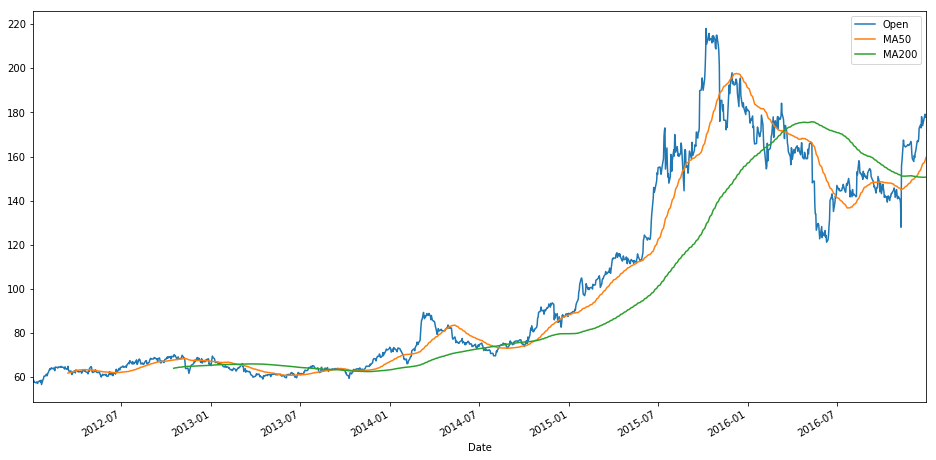

In [13]:
#Moving Averages
coke['MA50'] = coke['Open'].rolling(50).mean()
coke['MA200'] = coke['Open'].rolling(200).mean()
coke[['Open', 'MA50', 'MA200']].plot(figsize=(16,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116bb1f28>,
      dtype=object)

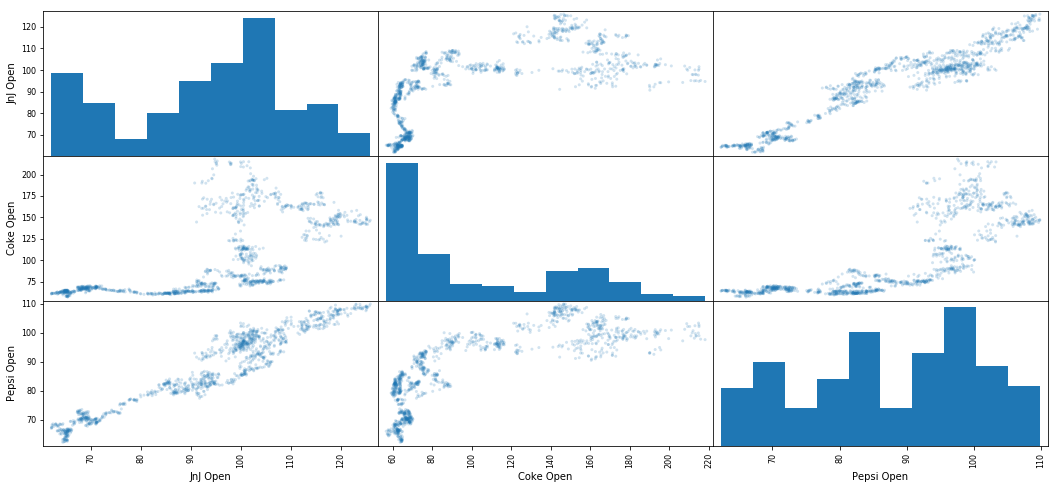

In [38]:
#Relationship between the stocks
fmcg_comp = pd.concat((jnj['Open'], coke['Open'], pepsi['Open']), axis = 1)
fmcg_comp.columns=['JnJ Open', 'Coke Open', 'Pepsi Open']
scatter_matrix(fmcg_comp,figsize=(18,8), alpha=0.2)

In [15]:
#Daily Percent Change
jnj['returns'] = jnj['Close'].pct_change(1)
pepsi['returns'] = pepsi['Close'].pct_change(1)
coke['returns'] = coke['Close'].pct_change(1)

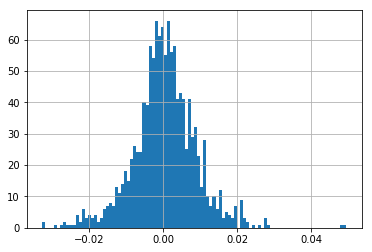

In [16]:
jnj['returns'].hist(bins=100)

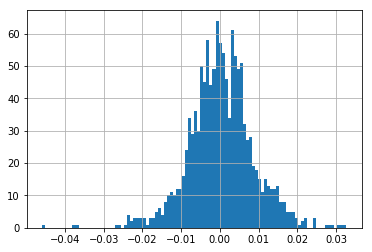

In [17]:
pepsi['returns'].hist(bins=100)

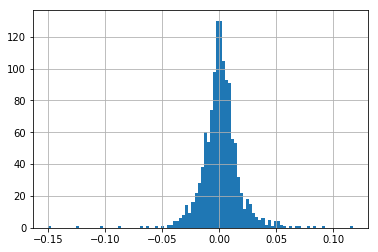

In [18]:
coke['returns'].hist(bins=100)

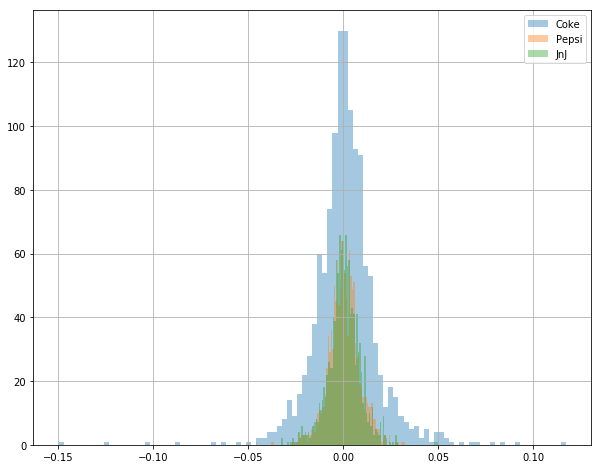

In [19]:
coke['returns'].hist(bins=100, label='Coke',figsize=(10,8), alpha=0.4)
pepsi['returns'].hist(bins=100, label='Pepsi',figsize=(10,8),alpha=0.4)
jnj['returns'].hist(bins=100, label='JnJ',figsize=(10,8),alpha=0.4)
plt.legend()

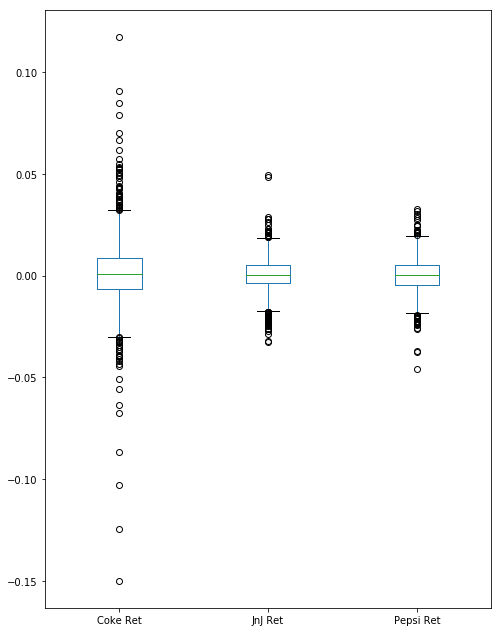

In [29]:
box_df = pd.concat([coke['returns'], jnj['returns'], pepsi['returns']], axis=1)
box_df.columns = ['Coke Ret', 'JnJ Ret', 'Pepsi Ret']
box_df.plot(kind='box',figsize=(8,11))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115de4668>,
      dtype=object)

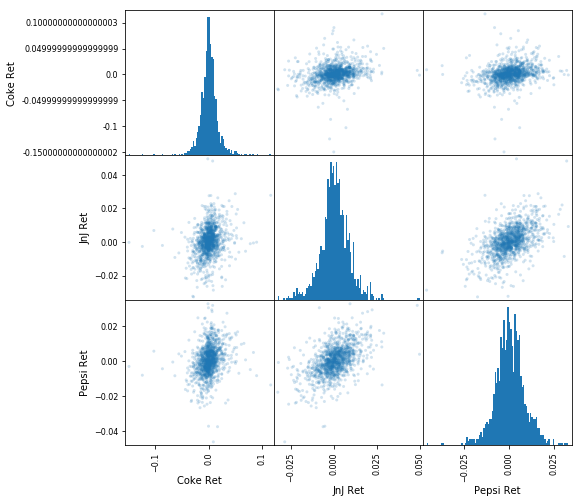

In [30]:
#Comparing Daily Returns between Stocks
scatter_matrix(box_df,figsize=(8,8), alpha=0.2, hist_kwds={'bins':100})

In [32]:
#Cumulative Daily Return
jnj['Cumulative Return'] = (1 + jnj['returns']).cumprod()
pepsi['Cumulative Return'] = (1 + pepsi['returns']).cumprod()
coke['Cumulative Return'] = (1 + coke['returns']).cumprod()

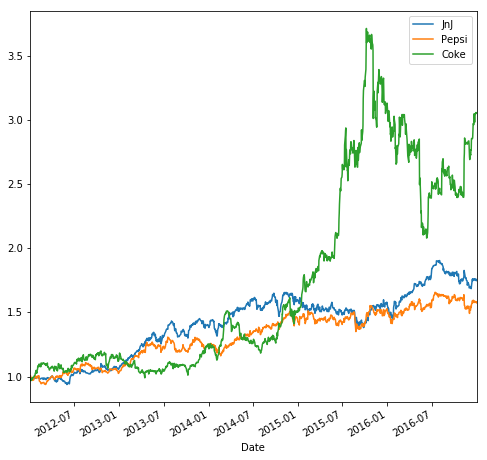

In [39]:
jnj['Cumulative Return'].plot(label='JnJ',figsize=(8,8))
pepsi['Cumulative Return'].plot(label='Pepsi',figsize=(8,8))
coke['Cumulative Return'].plot(label='Coke',figsize=(8,8))
plt.legend()